<a href="https://colab.research.google.com/github/sub-rat/3-MONTHS-ON-MachineLearning/blob/master/code/week6/ConvolutionNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x 
from keras.datasets import fashion_mnist
(train_X, train_Y), (test_X,test_Y) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


# Analyze the Data

In [2]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
print('Training data shape:', train_X.shape, train_Y.shape)
print('Testing data shape:', test_X.shape, test_Y.shape)

Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)


In [3]:
# find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs:', nClasses)
print('Output classes:', classes)

Total number of outputs: 10
Output classes: [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth: 9')

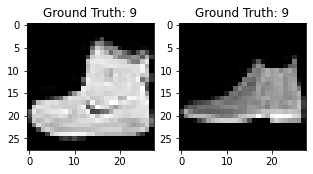

In [4]:
plt.figure(figsize=[5,5])

#display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth: {}".format(train_Y[0]))


#displaying the first image in test dataset
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth: {}".format(test_Y[0]))

# Data preprocessing


In [5]:
train_X = train_X.reshape(-1,28,28,1)
test_X = test_X.reshape(-1,28,28,1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.

In [7]:
#one hot encoding with keras.utils
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

#displaying the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

# Model The Data

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [0]:
batch_size = 64
epochs = 20
num_classes =10

In [0]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

# compile the model


In [12]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

In [13]:
fashion_train = fashion_model.fit(train_X,
                                  train_label,
                                  batch_size=batch_size,
                                  epochs=epochs,
                                  verbose=1,
                                  validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 85s 2ms/step - loss: 0.4708 - accuracy: 0.8292 - val_loss: 0.3417 - val_accuracy: 0.8784
Epoch 2/20
48000/48000 [==============================] - 85s 2ms/step - loss: 0.2932 - accuracy: 0.8932 - val_loss: 0.2884 - val_accuracy: 0.8938
Epoch 3/20
48000/48000 [==============================] - 84s 2ms/step - loss: 0.2474 - accuracy: 0.9087 - val_loss: 0.2630 - val_accuracy: 0.9043
Epoch 4/20
48000/48000 [==============================] - 85s 2ms/step - loss: 0.2161 - accuracy: 0.9204 - val_loss: 0.2425 - val_accuracy: 0.9136
Epoch 5/20
48000/48000 [==============================] - 85s 2ms/step - loss: 0.1879 - accuracy: 0.9306 - val_loss: 0.2229 - val_accuracy: 0.9201
Epoch 6/20
48000/48000 [==============================] - 92s 2ms/step - loss: 0.1667 - accuracy: 0.9381 - val_loss: 0.2218 - val_accuracy: 0.9212
Epoch 7/20
48000/48000 [==============================] - 87s 2ms/st

In [14]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.4703861451685429
Test accuracy: 0.9160000085830688


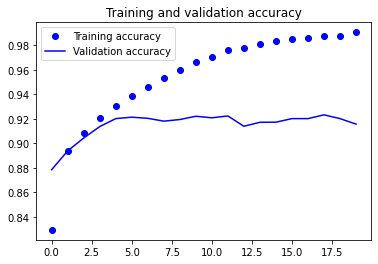

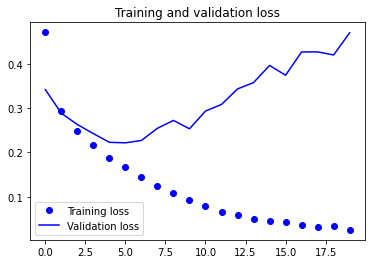

In [22]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
batch_size = 64 
epochs = 20 
num_classes = 10

In [0]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [25]:
fashion_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)         

In [0]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [27]:
fashion_train_dropout = fashion_model.fit(train_X,
                                          train_label,
                                          batch_size=batch_size,
                                          epochs=epochs,
                                          verbose=1,
                                          validation_data=(valid_X,valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 93s 2ms/step - loss: 0.5920 - accuracy: 0.7803 - val_loss: 0.3785 - val_accuracy: 0.8593
Epoch 2/20
48000/48000 [==============================] - 93s 2ms/step - loss: 0.3749 - accuracy: 0.8628 - val_loss: 0.3096 - val_accuracy: 0.8852
Epoch 3/20
48000/48000 [==============================] - 94s 2ms/step - loss: 0.3275 - accuracy: 0.8784 - val_loss: 0.2888 - val_accuracy: 0.8907
Epoch 4/20
48000/48000 [==============================] - 94s 2ms/step - loss: 0.3008 - accuracy: 0.8875 - val_loss: 0.2595 - val_accuracy: 0.9039
Epoch 5/20
48000/48000 [==============================] - 95s 2ms/step - loss: 0.2847 - accuracy: 0.8921 - val_loss: 0.2678 - val_accuracy: 0.9005
Epoch 6/20
48000/48000 [==============================] - 95s 2ms/step - loss: 0.2687 - accuracy: 0.8987 - val_loss: 0.2461 - val_accuracy: 0.9076
Epoch 7/20
48000/48000 [==============================] - 94s 2ms/st

In [0]:
fashion_model.save("fashion_model_dropout.h5yp")

# Model Evualation on Test data

In [31]:
test_eval = fashion_model.evaluate(test_X,test_Y_one_hot,verbose=1)

10000/10000 [==============================] - 5s 550us/step


In [32]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.22854849315881728
Test accuracy: 0.91839998960495


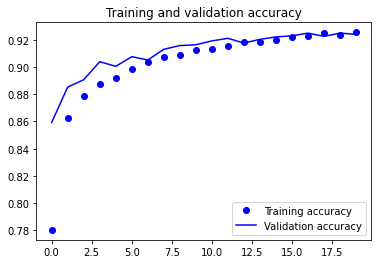

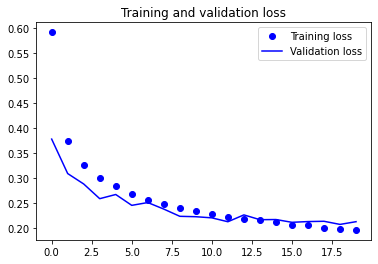

In [33]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


# Predictions

In [0]:
predicted_classes = fashion_model.predict(test_X)

In [35]:
predicted_classes = np.argmax(np.round(predicted_classes), axis=1)
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9154 correct labels


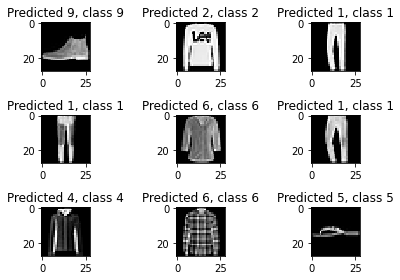

In [37]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))

for i, correct in enumerate(correct[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Predicted {}, class {}".format(predicted_classes[correct],test_Y[correct]))
  plt.tight_layout()

Found 846 incorrect labels


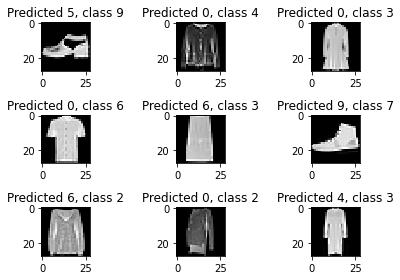

In [39]:
incorrect = np.where(predicted_classes!= test_Y)[0]
print("Found {} incorrect labels".format(len(incorrect)))

for i, incorrect in enumerate(incorrect[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Predicted {}, class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
  plt.tight_layout()

# Classification Report

In [40]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.78      0.89      0.83      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.87      0.88      0.87      1000
     Class 3       0.94      0.90      0.92      1000
     Class 4       0.89      0.85      0.87      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.79      0.74      0.76      1000
     Class 7       0.97      0.97      0.97      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.96      0.98      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

